# Computational Challenge 9 - Group 1: Youssaf, Zhao, Mohammad, Saul

In this challenge you will implement Schelling’ model of segregation. For a description of the
model, see p. 108 of the book by Easley and Kleinberg. As the book notes, you will have
several options in the implementation, but the results should not differ. I suggest using a
double loop to go over rows and columns of the lattice sequentially, so that you can easily
terminate the simulation if no agents have moved during one entire iteration. Note that the
system can also reach a dynamic equilibrium in which some of the agents will keep moving,
but the pattern is largely static.
The size of the domain is determined by the width and height. The “empty ratio” is
the fraction of the domain that is initially unoccupied, and the similarity threshold de-
termines the fraction of different neighbors above which an agent will move. Set a maximal
number of iterations, but also stop your simulations if your simulation reaches a stable
state. For the following you can use a 50 by 50, or larger domain. The similarity ratio $r_{sim} = n_{similar \ neighbors}/n_{neighbors}$ is the fraction of neighbors that have the same color as the
agent.

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
import random
import matplotlib.animation as animation
import time
import pylab as pl
from IPython import display
sns.set(style='ticks', palette='Set2')

In [170]:
def set_grid(num_col, num_row, num_ones, num_twos):
    grid = np.zeros((num_col, num_row))
    for i in range(num_ones):
        rand1D = np.random.randint(0, num_col)
        rand2D = np.random.randint(0, num_row)
        while grid[rand1D][rand2D] != 0:
            rand1D = np.random.randint(0, num_col)
            rand2D = np.random.randint(0, num_row)
        grid[rand1D][rand2D] = 1
        
    for i in range(num_twos):
        rand1D = np.random.randint(0, num_col)
        rand2D = np.random.randint(0, num_row)
        while grid[rand1D][rand2D] != 0:
            rand1D = np.random.randint(0, num_col)
            rand2D = np.random.randint(0, num_row)
        grid[rand1D][rand2D] = 2
    
    return grid

def calc_similarity(grid, i, j, num_col, num_row):
    above = i-1 if i > 0 else num_col-1
    below = i+1 if i < num_col-1 else 0
    left = j-1 if j > 0 else num_row-1
    right = j+1 if j < num_row-1 else 0
    
    neighbors = [(below,right), (below,left), 
                 (i,left), (i,right), 
                 (above,left), (above,j),
                 (above,right), (below,j)]
    
    one_counts = 0
    two_counts = 0
    agent_state = grid[i][j]

    for row,col in neighbors:
        if grid[row][col] == 1:
            one_counts += 1
        elif grid[row][col] == 2:
            two_counts += 1
            
    if one_counts+two_counts == 0:
        return 1
                
    one_fraction = one_counts/(one_counts+two_counts)
    two_fraction = two_counts/(one_counts+two_counts)
    
   
    if agent_state == 1:
        return one_fraction
    elif agent_state == 2:
        return two_fraction
        
    

def move(grid, i, j, threshold, num_col, num_row):
    above = i-1 if i > 0 else num_col-1
    below = i+1 if i < num_col-1 else 0
    left = j-1 if j > 0 else num_row-1
    right = j+1 if j < num_row-1 else 0
    
    neighbors = [(below,right), (below,left), 
                 (i,left), (i,right), 
                 (above,left), (above,j),
                 (above,right), (below,j)]
    
    one_counts = 0
    two_counts = 0
    agent_state = grid[i][j]

    for row,col in neighbors:
        if grid[row][col] == 1:
            one_counts += 1
        elif grid[row][col] == 2:
            two_counts += 1
            
    if one_counts+two_counts == 0:
        return False
                
    one_fraction = one_counts/(one_counts+two_counts)
    two_fraction = two_counts/(one_counts+two_counts)
        
    if (agent_state == 1 and one_fraction < threshold) or (agent_state == 2 and two_fraction < threshold):
         return True
    else:
        return False

## Animation

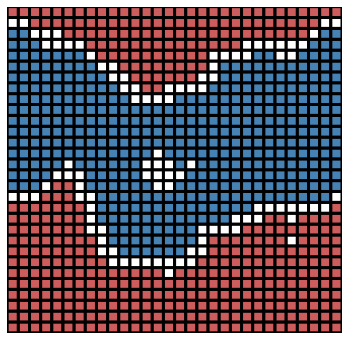

In [178]:
population_size = 900
num_ones = 400
num_twos = 400
max_iter = 110
threshold = 0.8

def animated_sim(population_size, threshold, num_ones, num_twos, max_iter):
    num_col = num_row = int(np.sqrt(population_size))
    grid = set_grid(num_col, num_row, num_ones, num_twos)
    current_iter = 0
    avg_similar_ratios = []
    plt.ion() 
    fig=plt.figure()

    
    while current_iter < max_iter:
        agent_similarities = []
        cmap = colors.ListedColormap(['White','steelblue', 'indianred'])
        plt.figure(figsize=(6,6))
        plt.axis('off')
        plt.pcolor(grid[::-1],cmap=cmap,edgecolors='k', linewidths=3)
        plt.show()
        display.clear_output(wait=True)
        time.sleep(0.2)
        avg_similar_ratios.append(np.mean(agent_similarities))
        for i in range(num_col):
            for j in range(num_row):
                if grid[i][j] != 0:
                    agent_similarities.append(calc_similarity(grid, i, j, num_col, num_row))
                    if move(grid, i, j, threshold, num_col, num_row):
                        new_row = np.random.randint(0, num_row)
                        new_col = np.random.randint(0, num_col)
                        while grid[new_row][new_col] != 0:
                            new_row = np.random.randint(0, num_row)
                            new_col = np.random.randint(0, num_col)
                        grid[new_row][new_col] = grid[i][j]
                        grid[i][j] = 0
        current_iter += 1
        
animated_sim(population_size, threshold , num_ones, num_twos, max_iter)

(a) Start with empty_ratio = 0.2, and increase the similarity threshold from 0.2 to 0.6.
Run the simulation until the average similarity ratio, $r_{sim}$ (it may keep oscillating a little, so add some tolerance). Does convergence take longer for smaller or larger thresholds? Explain why this could be.

In [159]:
def simulation(population_size, threshold, num_ones, num_twos, max_iter):
    num_col = num_row = int(np.sqrt(population_size))
    grid = set_grid(num_col, num_row, num_ones, num_twos)
    start_grid = grid
    current_iter = 0
    avg_similar_ratios = []
    
    while current_iter < max_iter:
        agent_similarities = []
        for i in range(num_col):
            for j in range(num_row):
                if grid[i][j] != 0:
                    agent_similarities.append(calc_similarity(grid, i, j, num_col, num_row))
                    if move(grid, i, j, threshold, num_col, num_row):
                        new_row = np.random.randint(0, num_row)
                        new_col = np.random.randint(0, num_col)
                        while grid[new_row][new_col] != 0:
                            new_row = np.random.randint(0, num_row)
                            new_col = np.random.randint(0, num_col)
                        grid[new_row][new_col] = grid[i][j]
                        grid[i][j] = 0
        avg_similar_ratios.append(np.mean(agent_similarities))
        current_iter += 1
    return grid, list(range(0, max_iter)), avg_similar_ratios

In [160]:
population_size = 2500
num_ones = 1000
num_twos = 1000
max_iter = 20

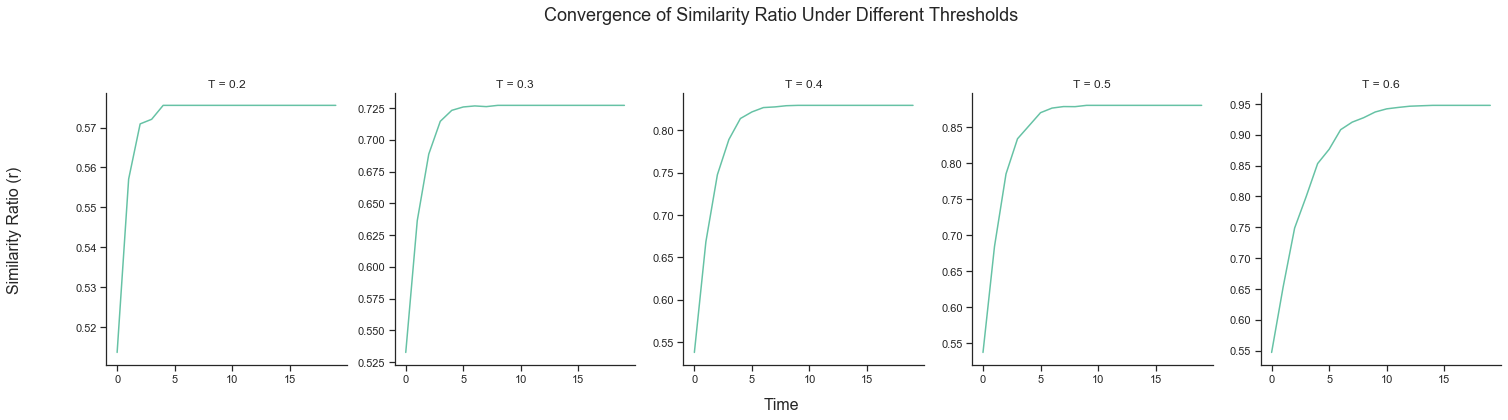

In [161]:
fig, ax = plt.subplots(1, 5, figsize=(25,5))
fig.suptitle('Convergence of Similarity Ratio Under Different Thresholds', fontsize=18, y=1.12)
fig.text(0.5, 0.0, 'Time', ha='center', fontsize=16)
fig.text(0.07, 0.5, 'Similarity Ratio (r)', va='center', rotation='vertical', fontsize=16)
similarity_thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
for i in range(len(similarity_thresholds)):
    _, time, avg_similar_ratios = simulation(population_size, similarity_thresholds[i], num_ones, num_twos, max_iter)
    ax[i].plot(time, avg_similar_ratios)
    ax[i].set_title("T = {}".format(similarity_thresholds[i]))
    sns.despine()

(b) Start with similarity_threshold = 0.4, and increase the empty_ratio from 0.1 to 0.6 in increments of 0.1 Run the simulation until convergence. Does convergence take longer for smaller or larger empty spaces? Explain why this could be.

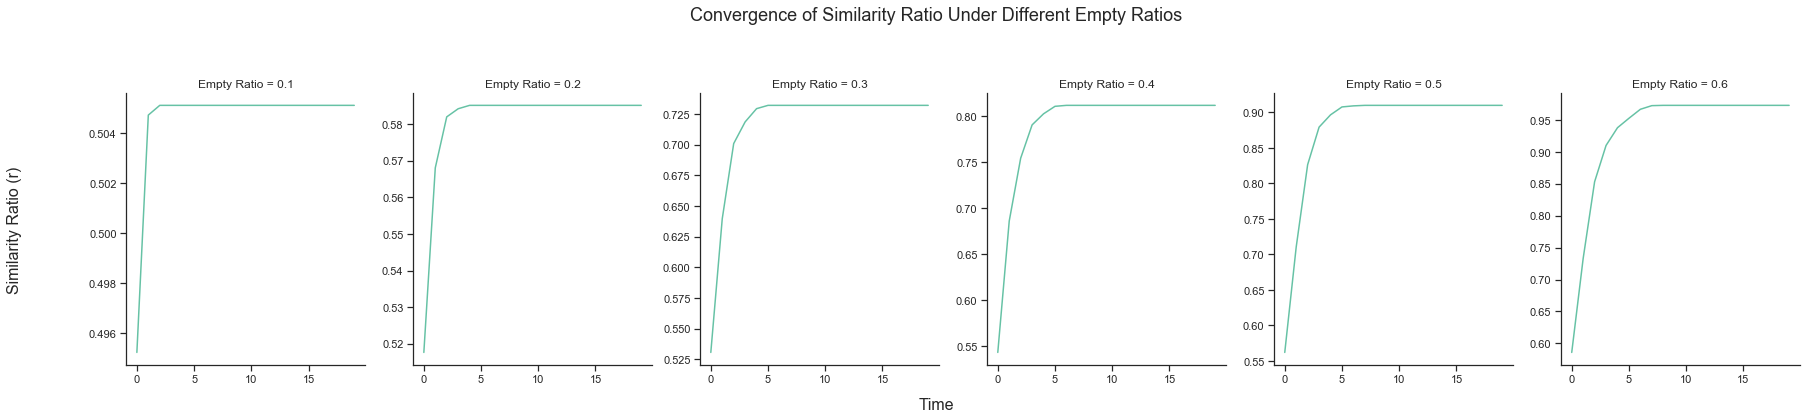

In [162]:
fig, ax = plt.subplots(1, 6, figsize=(30,5))
fig.suptitle('Convergence of Similarity Ratio Under Different Empty Ratios', fontsize=18, y=1.12)
fig.text(0.5, 0.0, 'Time', ha='center', fontsize=16)
fig.text(0.07, 0.5, 'Similarity Ratio (r)', va='center', rotation='vertical', fontsize=16)
empty_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for i in range(len(empty_ratios)):
    population_size = 2500
    num_ones = int((population_size-int(empty_ratios[i]*population_size))/2)
    num_twos = int((population_size-int(empty_ratios[i]*population_size))/2)
    max_iter = 20
    _, time, avg_similar_ratios = simulation(population_size, empty_ratios[i], num_ones, num_twos, max_iter)
    ax[i].plot(time, avg_similar_ratios)
    ax[i].set_title("Empty Ratio = {}".format(empty_ratios[i]))
    sns.despine()

(c) Run your simulations for similarity_threshold = 0.2–0.6 in increments of 0.1, and plot $r_{sim}$over time. How does $r_{sim}$ relate to the similarity threshold?

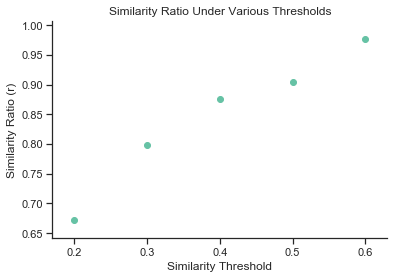

In [163]:
similarity_thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
rsims = []
for i in range(len(similarity_thresholds)):
    _, _, avg_similar_ratios = simulation(population_size, similarity_thresholds[i], num_ones, num_twos, max_iter)
    rsims.append(avg_similar_ratios[-1])
    
plt.scatter(similarity_thresholds, rsims)
plt.xlabel('Similarity Threshold')
plt.ylabel('Similarity Ratio (r)')
plt.title('Similarity Ratio Under Various Thresholds')
sns.despine()

(d) Now assume that with some probability $r$ even satisfied agent moves. That is there is a small probability $r$
that during a time step an agent moves to a random location, regardless of its neighborhood. How does increasing $r$ impact your observations in part (b)?

In [164]:
def r_simulation(population_size, r, threshold, num_ones, num_twos, max_iter):
    num_col = num_row = int(np.sqrt(population_size))
    grid = set_grid(num_col, num_row, num_ones, num_twos)
    start_grid = grid
    current_iter = 0
    avg_similar_ratios = []
    
    while current_iter < max_iter:
        agent_similarities = []
        for i in range(num_col):
            for j in range(num_row):
                if grid[i][j] != 0:
                    agent_similarities.append(calc_similarity(grid, i, j, num_col, num_row))
                    if move(grid, i, j, threshold, num_col, num_row):
                        new_row = np.random.randint(0, num_row)
                        new_col = np.random.randint(0, num_col)
                        while grid[new_row][new_col] != 0:
                            new_row = np.random.randint(0, num_row)
                            new_col = np.random.randint(0, num_col)
                        grid[new_row][new_col] = grid[i][j]
                        grid[i][j] = 0
                    else:
                        if np.random.random() < r:
                            new_row = np.random.randint(0, num_row)
                            new_col = np.random.randint(0, num_col)
                            while grid[new_row][new_col] != 0:
                                new_row = np.random.randint(0, num_row)
                                new_col = np.random.randint(0, num_col)
                            grid[new_row][new_col] = grid[i][j]
                            grid[i][j] = 0
        avg_similar_ratios.append(np.mean(agent_similarities))
        current_iter += 1
    return grid, list(range(0, max_iter)), avg_similar_ratios

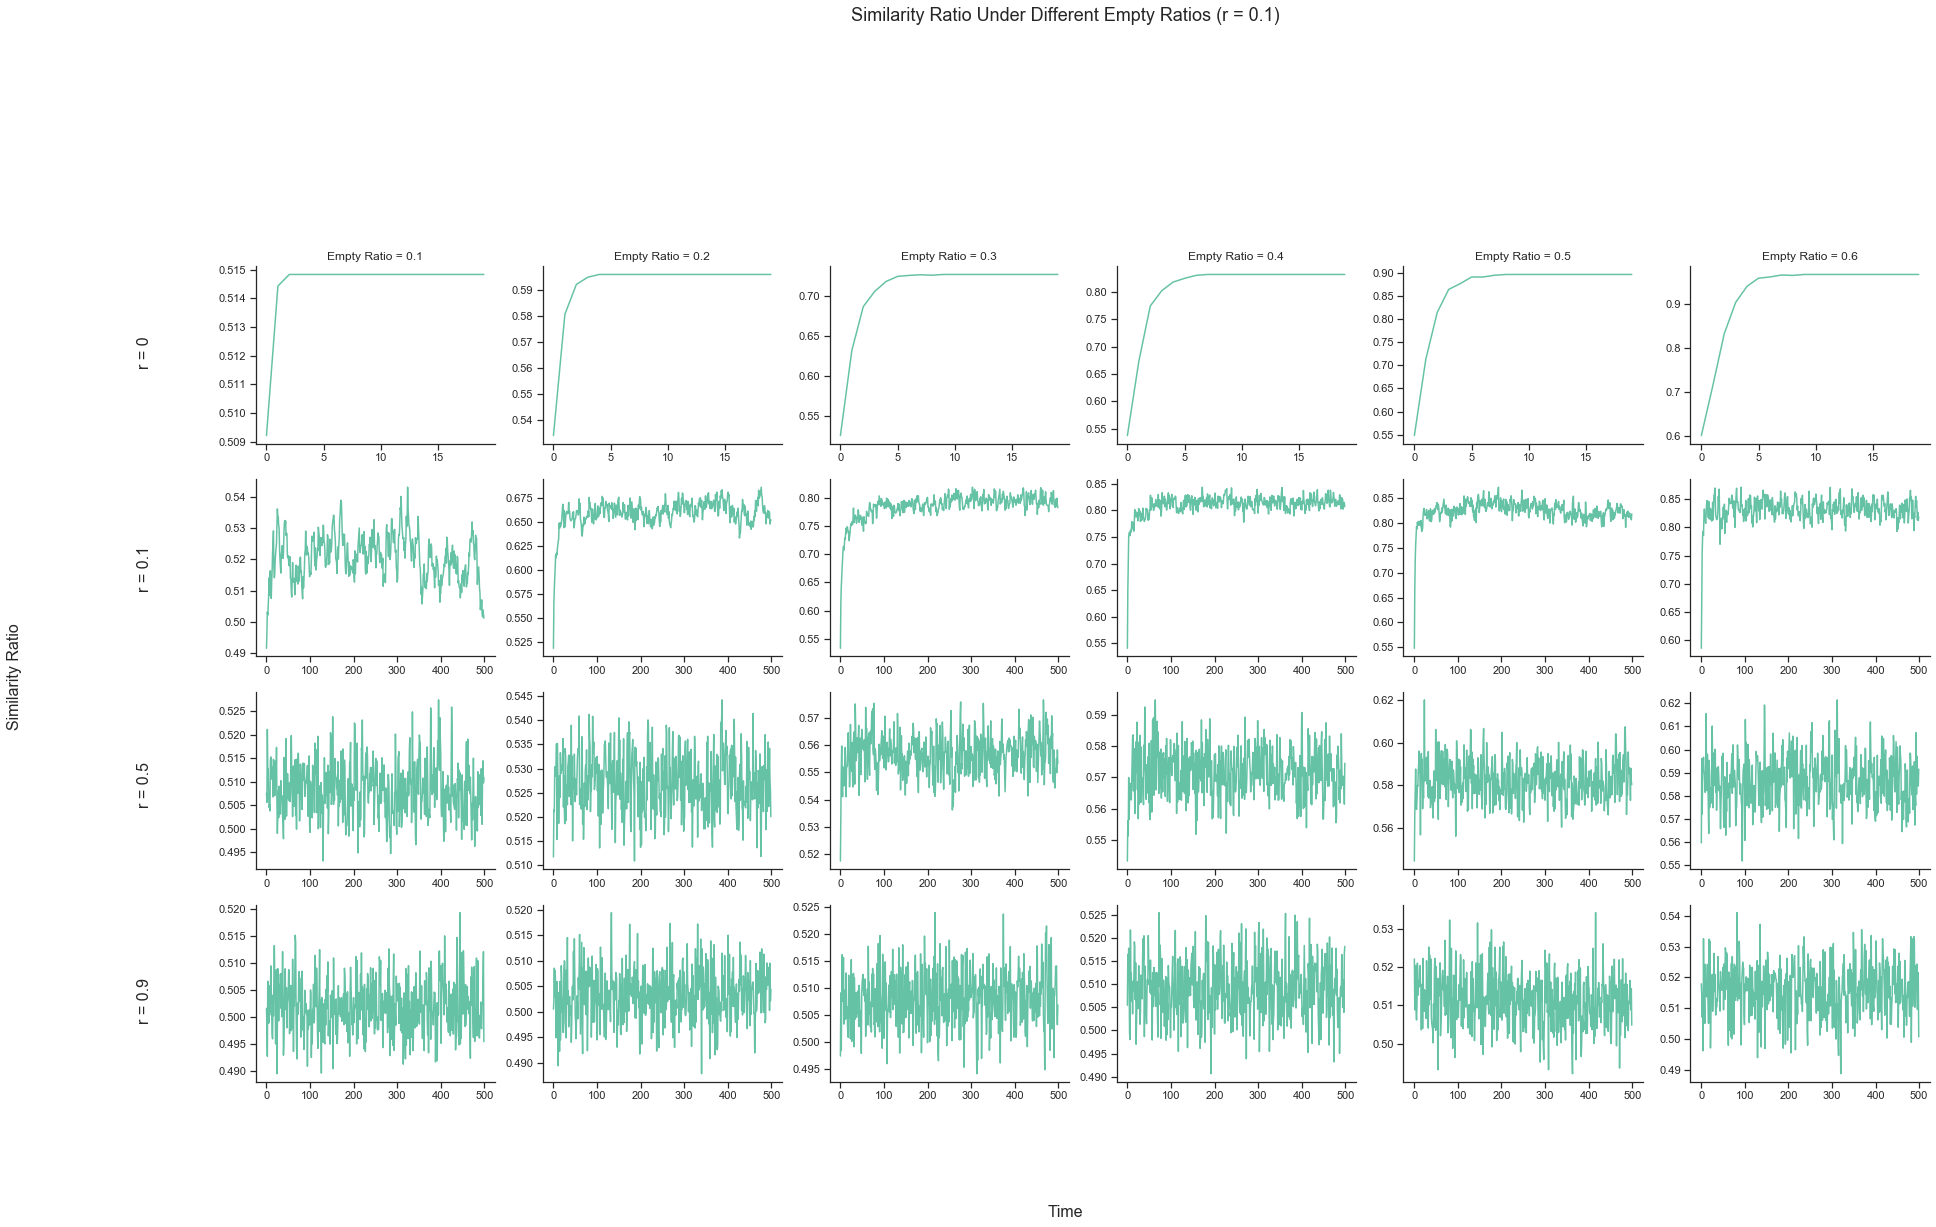

In [165]:
fig, ax = plt.subplots(4, 6, figsize=(30,15))
fig.suptitle('Similarity Ratio Under Different Empty Ratios (r = 0.1)', fontsize=18, y=1.12)
fig.text(0.01, 0.5, 'Similarity Ratio', va='center', rotation='vertical', fontsize=16)
fig.text(0.5, 0.0, 'Time', ha='center', fontsize=16)
fig.text(0.07, 0.8, 'r = 0', va='center', rotation='vertical', fontsize=16)
fig.text(0.07, 0.6, 'r = 0.1', va='center', rotation='vertical', fontsize=16)
fig.text(0.07, 0.4, 'r = 0.5', va='center', rotation='vertical', fontsize=16)
fig.text(0.07, 0.2, 'r = 0.9', va='center', rotation='vertical', fontsize=16)
empty_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for i in range(len(empty_ratios)):
    population_size = 2500
    num_ones = int((population_size-int(empty_ratios[i]*population_size))/2)
    num_twos = int((population_size-int(empty_ratios[i]*population_size))/2)
    max_iter = 20
    _, time, avg_similar_ratios = simulation(population_size, empty_ratios[i], num_ones, num_twos, max_iter)
    ax[0, i].plot(time, avg_similar_ratios)
    ax[0, i].set_title("Empty Ratio = {}".format(empty_ratios[i]))
    sns.despine()

r = 0.1

for i in range(len(empty_ratios)):
    population_size = 2500
    num_ones = int((population_size-int(empty_ratios[i]*population_size))/2)
    num_twos = int((population_size-int(empty_ratios[i]*population_size))/2)
    max_iter = 500
    _, time, avg_similar_ratios = r_simulation(population_size, r, empty_ratios[i], num_ones, num_twos, max_iter)
    ax[1, i].plot(time, avg_similar_ratios)
    sns.despine()
    
r = 0.5
    
for i in range(len(empty_ratios)):
    population_size = 2500
    num_ones = int((population_size-int(empty_ratios[i]*population_size))/2)
    num_twos = int((population_size-int(empty_ratios[i]*population_size))/2)
    max_iter = 500
    _, time, avg_similar_ratios = r_simulation(population_size, r, empty_ratios[i], num_ones, num_twos, max_iter)
    ax[2, i].plot(time, avg_similar_ratios)
    sns.despine()
    
r = 0.9
    
for i in range(len(empty_ratios)):
    population_size = 2500
    num_ones = int((population_size-int(empty_ratios[i]*population_size))/2)
    num_twos = int((population_size-int(empty_ratios[i]*population_size))/2)
    max_iter = 500
    _, time, avg_similar_ratios = r_simulation(population_size, r, empty_ratios[i], num_ones, num_twos, max_iter)
    ax[3, i].plot(time, avg_similar_ratios)
    sns.despine()